In [26]:
import math

distancia_total = 100

haste = 3
angulo_entrada = 15 * math.pi / 180

distancia_maquina = 0.3

angulo_quebra_min = 4 * math.pi / 180
angulo_quebra_max = 7 * math.pi / 180

angulo_quebra = (angulo_quebra_min + angulo_quebra_max) / 2

In [18]:
import math

# def angulo(porcentagem):
#     return math.atan(porcentagem/100)

def delta_y(haste, angulo):
    return haste * math.sin(angulo)

def delta_x(haste, angulo):
    return haste * math.cos(angulo)

In [88]:
import math

def descida(profundidade):
    y = -delta_y(distancia_maquina, angulo_entrada)
    x = delta_x(distancia_maquina, angulo_entrada)
    
    pontos = [(x, y)]
    
    i = 1
    while y > profundidade / 2:
        y = y - delta_y(haste, angulo_entrada + angulo_quebra * i)
        x = x + delta_x(haste, angulo_entrada + angulo_quebra * i)
        pontos += [(x, y)]
        i += 1

    
    i -= 1
    while y > profundidade:
        y = y - delta_y(haste, angulo_entrada + angulo_quebra * i)
        x = x + delta_x(haste, angulo_entrada + angulo_quebra * i)
        pontos += [(x, y)]
        i -= 1
        
    return pontos

def horizontal(pontos_descida):
    
    distancia_descida = pontos_descida[-1][0]
    
    num_hastes_horizontal = round((distancia_total - 2 * distancia_descida) / haste)
    
    pontos_horizontal = []
    
    for i in range(1, num_hastes_horizontal + 1):
        pontos_horizontal += [(distancia_descida + haste * i, pontos_descida[-1][1])]
        
    return pontos_horizontal

def subida(pontos_descida, pontos_horizontal):
    
    distancia_horizontal = pontos_horizontal[-1][0] - pontos_descida[-1][0]
    
    pontos_subida = []
    
    for x, y in reversed(pontos_descida[:-1]):
        pontos_subida += [((pontos_descida[-1][0] - x) + pontos_horizontal[-1][0], y)]
    
    return pontos_subida

In [89]:
pontos_descida = descida(-15)
print(pontos_descida)
print()

pontos_horizontal = horizontal(pontos_descida)
print(pontos_horizontal)
print()

pontos_subida = subida(pontos_descida, pontos_horizontal)
print(pontos_subida)

pontos = pontos_descida + pontos_horizontal + pontos_subida

[(0.2897777478867205, -0.07764571353075622), (3.0997943156319137, -1.1282678573091585), (5.796176454529415, -2.4433812976763907), (8.354096947591692, -4.010876991824237), (10.750003477733571, -5.816322061280381), (12.961835488163944, -7.843092684127361), (15.173667498594316, -9.869863306974342), (17.569574028736195, -11.675308376430486), (20.12749452179847, -13.242804070578332), (22.823876660695973, -14.557917510945565), (25.633893228441167, -15.608539654723966)]

[(28.633893228441167, -15.608539654723966), (31.633893228441167, -15.608539654723966), (34.63389322844117, -15.608539654723966), (37.63389322844117, -15.608539654723966), (40.63389322844117, -15.608539654723966), (43.63389322844117, -15.608539654723966), (46.63389322844117, -15.608539654723966), (49.63389322844117, -15.608539654723966), (52.63389322844117, -15.608539654723966), (55.63389322844117, -15.608539654723966), (58.63389322844117, -15.608539654723966), (61.63389322844117, -15.608539654723966), (64.63389322844117, -15.

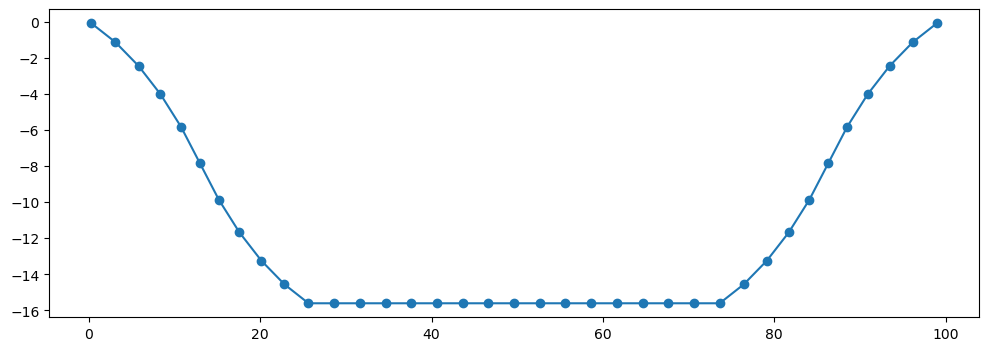

In [90]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 4),)

plt.scatter(*zip(*pontos))
plt.plot(*zip(*pontos))

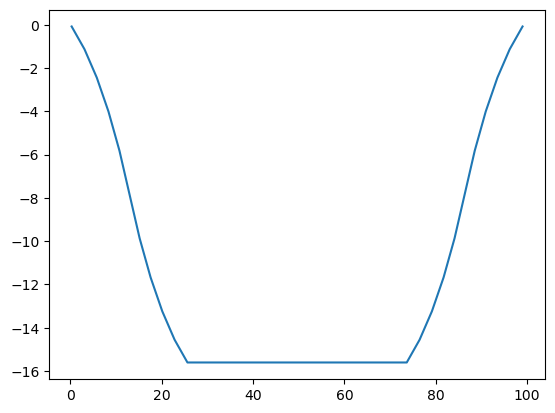

In [114]:
import numpy as np
import scipy.interpolate as interpolate

xs = [ponto[0] for ponto in pontos]

linear_interpolation_func = interpolate.interp1d(*zip(*pontos), kind='linear')
ys = linear_interpolation_func(xs)

plt.plot(xs, ys)

In [118]:
from scipy.integrate import quad

quad(math.pi * 4 * linear_interpolation_func, 0, 100)

TypeError: unsupported operand type(s) for *: 'float' and 'interp1d'

In [126]:
linear_interpolation_func.x

array([ 0.28977775,  3.09979432,  5.79617645,  8.35409695, 10.75000348,
       12.96183549, 15.1736675 , 17.56957403, 20.12749452, 22.82387666,
       25.63389323, 28.63389323, 31.63389323, 34.63389323, 37.63389323,
       40.63389323, 43.63389323, 46.63389323, 49.63389323, 52.63389323,
       55.63389323, 58.63389323, 61.63389323, 64.63389323, 67.63389323,
       70.63389323, 73.63389323, 76.4439098 , 79.14029194, 81.69821243,
       84.09411896, 86.30595097, 88.51778298, 90.91368951, 93.47161   ,
       96.16799214, 98.97800871])